<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/2_DatosEstadisticos_Probabilidad.ipynb)

<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
    
* [Tipos de datos estadísticos](#a)   
* [Medidas de tendencia central](#b) 
* [Medidas de dispersión](#c) 
* [Distribuciones de probabilidad](#d)
* [Ejercicio](#e)

<a id="a"></a>
<h1><center>2.1. Tipos de datos estadísticos</center></h1>

[Regreso a contenido](#contenido)

Para construir un **pipeline** adecuado en ciencia de datos, debemos tener un buen entendimiento del tipo de variables que estaremos percibiendo de los diferentes conjuntos de datos (datasets) que nos podamos encontrar....


---

Veamos ahora los conceptos estadísticos básicos relacionados con el tipo de datos que se estudian.

Se llama **variable estadística** a cada una de las características que pueden estudiarse de la población (o de muestras).

1. **Cualitativas**: son variables que reflejan la propiedad o calidad de los objetos. Y aquí los números no significan ellos mismos, como en el caso cuantitativo, sino algunas cualidades o propiedades de los objetos. En otras palabras, sirven como marcadores para algunas categorías. Por ejemplo, digamos que comparamos a personas que viven en un estado con personas que viven en otro estado. 

   Podemos codificar a las personas de Morelos por 1, Guadalajara por 2, uno y dos no significarían nada excepto que denotan estas categorías, que son el centro de nuestro análisis.

 1.1. *Variables nominales*:  es la escala más básica, la más sencilla. La única información que contiene es información sobre un objeto que pertenece a una determinada clase o grupo. Significa que estas variables solo se pueden medir en términos de pertenencia a algunas clases significativamente diferentes, y no podrá determinar el orden de estas clases.
 
 1.2. *Variables ordinales*: se diferencian ligeramente de las variables nominales por el hecho en el orden que aparecen. Entonces, los valores no solo dividen los objetos en clases o grupos, sino que también los ordenan de cierta manera.
 
---

2. **Cuantitativas**: aquellas cuyo resultado es un número. A su vez, las hay de dos tipos:
    
 2.1. *Cuantitativas discretas*: cuando se toman valores aislados. Tomemos como ejemplo el número de hijos en la familia: podemos tener 1 hijo, 3 hijos, 5 hijos e incluso 10, pero no podemos tener 1,5 o 3,75. Es decir, estos son algunos valores discretos en forma de puntos.
 
  2.2. *Cuantitativas continuas*: ocupa todo el espacio, puede ser cualquier valor de -∞ a +∞, puede ser fraccional. Por ejemplo, podemos medir el tiempo en días, horas, segundos, milisegundos, etc. La escala continua se determina a través de todos los valores posibles.

![img](https://luminousmen.com/media/data-types-in-ds.jpeg)

### 2.1.1. Análisis de datos categóricos con Python

---

Cuando trabajamos con estadísticas, es importante reconocer los diferentes tipos de datos: numéricos (discretos y continuos) y categóricos. Los datos no son más que observaciones del mundo en que vivimos, por tanto, los mismos pueden venir en diferentes formas, no solo numérica. 

---

Los datos se dividen en categorías, pero los números colocados en cada categoría tienen un significado. Por ejemplo, la calificación de un restaurante en una escala de 0 (bajo) a 5 (más alta) estrellas representa datos ordinales. Los datos ordinales son a menudo tratados como datos categóricos, en el sentido que se suelen agrupar y ordenar. Sin embargo, a diferencia de los datos categóricos, los números sí tienen un significado matemático.

---

![img](https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/Descriptive-Statistics-in-Python_Watermarked.fec81e9a41f9.jpg&w=960&sig=274c90a9fc73c1aafccc437c2db2c7ba12bc4c4c)

También vamos a utilizar la librería [pydataset](https://pypi.org/project/pydataset/), la cual nos facilita cargar los diferentes dataset para analizar.

La idea es realizar un análisis estadístico sobre los datos de los sobrevivientes a la tragedia del Titanic.

In [1]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Se debe recordar que para la primera ejecución de este código, 
#se debe habilidar la instalación de 'pydataset'
#!pip install pydataset
from pydataset import data
%matplotlib notebook
#Añadir la siguiente línea de código
%matplotlib inline 

In [2]:
# importando dataset
titanic = data('titanic')
# ver primeros 10 registros
titanic.head(10)
# visualizar toda la tabla, recordemos que el TIPO DE DATO de 'titanic' es un DataFrame de la paquetería Pandas
# titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 1 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     1316 non-null   object
 1   age       1316 non-null   object
 2   sex       1316 non-null   object
 3   survived  1316 non-null   object
dtypes: object(4)
memory usage: 51.4+ KB


In [4]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


## El problema con datos como estos, y en general con la mayoría de las tablas de datos, es que nos presentan mucha información y no nos permiten ver que es lo que realmente sucede o sucedió. 

Por tanto, deberíamos procesarla de alguna manera para hacernos una imagen de lo que los datos realmente representan y nos quieren decir; y que mejor manera para hacernos una imagen de algo que utilizar **visualizaciones**.

-------

Una buena **visualización de los datos** puede revelar cosas que es probable que no podamos ver en una *tabla de números* y nos ayudará a pensar con claridad acerca de los <font color = red>**patrones**</font> y <font color = red>**relaciones**</font> que pueden estar *escondidos* en los datos. 


También nos va a ayudar a encontrar las características y patrones más importantes o los casos que son realmente excepcionales y no deberíamos de encontrar.

### 2.1.2. Tablas de frecuencia

Para hacernos una *imagen de los datos*, lo primero que tenemos que hacer es agruparlos. 

Al armar diferentes grupos nos vamos acercando a la comprensión de los datos.

**La idea es ir agrupando las cosas que parecen ir juntas, para poder ver como se distribuyen a través de las diferentes categorías**. 

Para los *datos categóricos*, agrupar es fácil; simplemente debemos contar el número de ítems que corresponden a cada categoría y juntarlos. 

Una forma en la que podemos agrupar nuestro dataset del Titanic es contando las diferentes clases de pasajeros. Podemos organizar estos conteos en una *tabla de frecuencia*, que registra los totales y los nombres de las categorías utilizando la función **value_counts** que nos proporciona Pandas del siguiente modo:

In [5]:
# tabla de frecuencia de clases de pasajeros
pd.value_counts(titanic['class'])

3rd class    706
1st class    325
2nd class    285
Name: class, dtype: int64

Contar las cantidad de apariciones de cada categoría puede ser útil, pero a veces puede resultar más útil saber la *fracción* o proporción de los datos de cada **categoría**, así que podríamos entonces dividir los recuentos por el total de casos para obtener los porcentajes que representa cada categoría.


---

Una tabla de **frecuencia relativa** muestra los porcentajes, en lugar de los recuentos de los valores en cada categoría. Ambos tipos de tablas muestran cómo los casos se distribuyen a través de las categorías. 

De esta manera, ellas describen la distribución de una variable categórica, ya que enumeran las posibles categorías y nos dicen con qué frecuencia se produce cada una de ellas.

In [6]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['class'].value_counts() / len(titanic['class'])

3rd class    53.647416
1st class    24.696049
2nd class    21.656535
Name: class, dtype: float64

### 2.1.3. Gráficos de pastel y barras

---

El gráfico de barras nos ayuda a darnos una impresión visual más precisa de la distribución de nuestros datos. 

La altura de cada barra muestra el recuento de su categoría. Los barras tienen el mismo ancho, por lo que sus alturas determinan sus áreas, y estas áreas son proporcionales a los recuentos en cada categoría. 

De esta forma, podemos ver fácilmente que había más del doble de pasajeros de tercera clase, que de primera o segunda clase. 

Los gráficos de barras hacen que este tipo de comparaciones sean fáciles y naturales. Veamos como podemos crearlos de forma sencilla utilizando el método **plot** dentro de un **DataFrame** de **Pandas**.

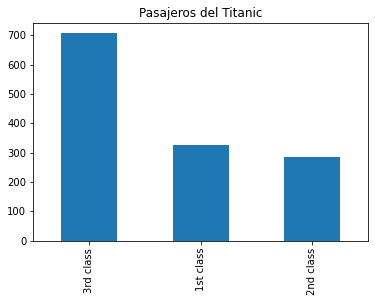

In [7]:
# Gráfico de barras de pasajeros del Titanic
# Se puede añadir %matplotlib inline
plot = titanic['class'].value_counts().plot(kind='bar', title='Pasajeros del Titanic')

Si quisiéramos enfocarnos en la proporción relativa de los pasajeros de cada una de las clases, simplemente podemos sustituir a los recuentos con porcentajes y utilizar un *gráfico de barras de frecuencias relativas*.

<AxesSubplot:title={'center':'Pasajeros del Titanic %'}>

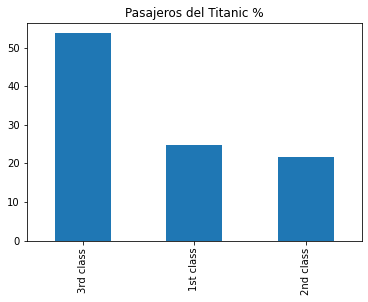

In [8]:
# gráfico de barras de frecuencias relativas.
plot = (100 * titanic['class'].value_counts() / len(titanic['class'])).plot(kind='bar', title='Pasajeros del Titanic %')
plot

### 2.1.4. Gráfico de pastel

---

El gráfico de pastel muestra el total de casos como un círculo y luego corta este círculo en piezas cuyos tamaños son proporcionales a la fracción que cada categoría representa sobre el total de casos. 

Los gráfico de pastel dan una impresión rápida de cómo todo un grupo se divide en grupos más pequeños. Lo podríamos graficar del siguiente modo, también utilizando el método plot:

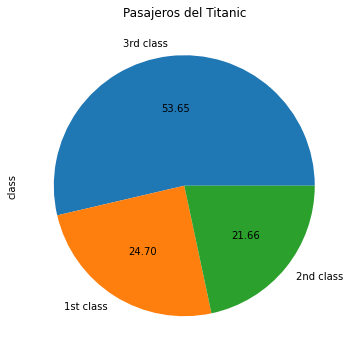

In [9]:
# Gráfico de tarta de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')

Como se puede apreciar, con el gráfico de tarta no es tan fácil determinar que los pasajeros de tercera clase son más que el doble que los de primera clase; tampoco es fácil determinar si hay más pasajeros de primera o de segunda clase. Para este tipo de comparaciones, son mucho más útiles los gráficos de barras.

### 2.1.5. Relacionando variables categóricas¶

---

Al analizar la tragedia del Titanic, una de las preguntas que podríamos hacer es **¿existe alguna relación entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia?**. 

Para poder responder a esta pregunta, vamos a necesitar analizar a las variables **class** y **survived** de nuestro dataset en forma conjunta. 

---

Una buena forma de analizar dos variables categóricas en forma conjunta, es agrupar los recuentos en una tabla de doble entrada; este tipo de tablas se conocen en estadística con el nombre de tabla de contingencia. Veamos como podemos crear esta tabla utilizando la función **crosstab** de **Pandas**.

In [10]:
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [11]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


Los márgenes de la tabla, tanto en la derecha y en la parte inferior, nos muestran los totales. La línea inferior de la tabla representa la distribución de frecuencia de la clase de pasajeros. 

La columna derecha de la tabla es la distribución de frecuencia de la variable supervivencia. 

Cuando se presenta la información de este modo, cada celda de cada uno de los márgenes de la tabla representa la *distribución marginal* de esa variable en particular. 


Cada celda nos va a mostrar el recuento para la combinación de los valores de nuestras dos variables categóricas, en este caso **class** y **survived**.

---

Al igual de como habíamos visto con las tablas de frecuencia, también nos podría ser útil representar a las tablas de contingencia con porcentajes relativos; esto lo podríamos realizar utilizando el método apply del siguiente modo:

In [12]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['class'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)
# Es importante recordar que en la línea de código anterior, al estar usando Pandas, podemos realizar la operación
#APPLY, en donde realizamos un recorrido por el conjunto de datos, el cual estará considerando las líneas o renglones
#dependiendo la asignación de axis
# axis = 0 - renglones
# axis = 1 - columnas

# para este caso, es parecido el comportamiento de la tabla de contigencia
# pd.crosstab(index=titanic['survived'], columns=titanic['class'], margins=True).apply(lambda r: r/len(titanic) *100, axis=0)

class,1st class,2nd class,3rd class,All
survived,,,,
no,9.270517,12.689970,40.121581,62.082067
yes,15.425532,8.966565,13.525836,37.917933
All,24.696049,21.656535,53.647416,100.000000


Con esta tabla podemos ver fácilmente que solo el 37.91% de los pasajeros sobrevivió a la tragedia y que este 37% se compone de la siguiente forma: del total de pasajeros sobrevivió un 15.42% de pasajeros que eran de primera clase, un 8.97% que eran de segunda clase y un 13.52% que eran pasajeros de tercera clase.

---

Volviendo a nuestra pregunta inicial sobre la posibilidad de sobrevivir según la clase de pasajero, podría ser más útil armar la tabla de porcentajes como un porcentaje relativo sobre el total de cada fila, es decir calcular el porcentaje relativo que cada clase tiene sobre haber sobrevivido o no. Esto lo podemos realizar del siguiente modo:

In [13]:
# tabla de contingencia en porcentajes relativos segun sobreviviente
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

# tabla de contingencia en porcentajes relativos segun sobreviviente con datos redondeados a 3 dig. significativos
# pd.crosstab(index=titanic['survived'], columns=titanic['class']).apply(lambda r: r/r.sum() *100, axis=1).round(3)

# Otro ejemplo de código para el redondeo
# pd.crosstab(index=titanic['survived'], columns=titanic['class']).apply(lambda r: round(r/len(titanic),5) *100, axis=1)

class,1st class,2nd class,3rd class
survived,,,
no,14.932681,20.440636,64.626683
yes,40.681363,23.647295,35.671343


Aquí podemos ver que de los pasajeros que sobrevivieron a la tragedia, el 40.68% correspondían a primera clase, el 35.67% a tercera clase y el 23.65% a segunda clase. Por tanto podríamos inferir que los pasajeros de primera clase tenían más posibilidades de sobrevivir.

---

Es más, también podríamos armar la tabla de porcentaje relativos en relación al total de cada clase de pasajero y así podríamos ver que de los pasajeros de primera clase, logró sobrevivir un 62.46%.

In [14]:
# tabla de contingencia en porcentajes relativos segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

####### Como añadir otras clomnas a la tabla de contigencia

#np.round(pd.crosstab(index=titanic['survived'], 
#                     columns=[titanic['class'],titanic['sex']],
#                     margins=True).apply(lambda r: r/len(titanic) *100,axis=1),2) . Redondeado a 2 dig. sig.

#pd.crosstab(index=titanic['survived'], 
#                     columns=[titanic['class'],titanic['sex']],
#                     margins=True)

class,1st class,2nd class,3rd class
survived,,,
no,37.538462,58.596491,74.787535
yes,62.461538,41.403509,25.212465


Este último resultado lo podríamos representar visualmente con simples gráfico de barras del siguiente modo:

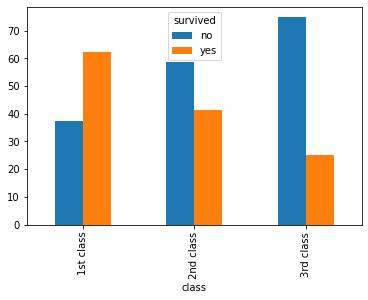

In [15]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['class'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

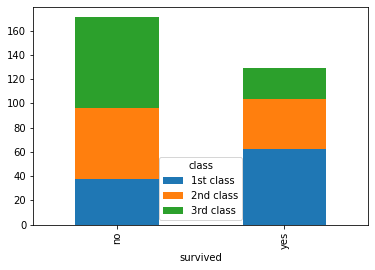

In [16]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['class']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

## Estas mismas manipulaciones las podemos realizar para otro tipo de combinación de variables categóricas, como podría ser el sexo o la edad de los pasajeros, pero eso ya se los dejo a ustedes para que se entretengan y practiquen un rato.

---

En esta sección, vamos a ver como podemos manipular, interpretar y obtener información de los datos cuantitativos.

# Recordemos que las **variables cuantitativas** son variables medidas en una escala numérica. 
Altura, peso, tiempo de respuesta, la calificación subjetiva del dolor, la temperatura, y la puntuación en un examen, son ejemplos de variables cuantitativas. 


Las variables cuantitativas se distinguen de las variables categóricas (también llamadas cualitativas) como el color favorito, religión, ciudad de nacimiento, y el deporte favorito; en las que no hay un orden o medida involucrados.

### 2.1.6. Analizando datos cuantitativos con Python

---

Para los ejemplos de esta sección, vamos a trabajar con el dataset **faithful**, el cual consiste en una colección de observaciones sobre las erupciones del géiser Old Faithful en el parque nacional Yellowstone de los Estados Unidos. La información que contiene este dataset es la siguiente:


In [17]:
#En esta sección seguimos utilizando la paquetería de 'pydataset', en caso de ser necesario, 
#habilita y ejecuta las siguientes líneas de código

#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import seaborn as sns
#!pip install pydataset
#from pydataset import data
#%matplotlib inline 

faithful = data('faithful')
faithful

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


Como podemos ver, faithful es un dataset bastante simple que solo contiene observaciones de dos variables; la primera, que se llama eruptions, contiene la información de la duración de la erupción del géiser; mientras que la segunda, se llama waiting y contiene la información sobre el tiempo de espera para la siguiente erupción del géiser.

---

Al igual de como comentábamos cuando analizamos datos categóricos, lo primero que deberíamos intentar hacer es crear una imagen que represente de la mejor manera posible a nuestros datos, ya que nuestro cerebro tiende a procesar mejor la información visual. Para el caso de las variables cuantitativas, un buen candidato para comenzar a hacernos una imagen de lo que nuestros datos representan, son los **histogramas**.

### 2.1.7. Histogramas

---

Para las variables cuantitativas, a diferencia de lo que pasaba con las variables categóricas, no existe una forma obvia de agrupar los datos; por tal motivo lo que se suele hacer es, dividir los posibles valores en diferentes contenedores del mismo tamaño y luego contar el número de casos que cae dentro de cada uno de los contenedores. 


Estos contenedores junto con sus recuentos, nos proporcionan una imagen de la distribución de la variable cuantitativa y constituyen la base para poder graficar el histograma. 


Para construir el gráfico, simplemente debemos representar a los recuentos como barras y graficarlas contra los valores de cada uno de los contenedores.


**Con Python podemos representar fácilmente el histograma de la variable eruptions utilizando el método *hist* del DataFrame de *Pandas* del siguiente modo**:

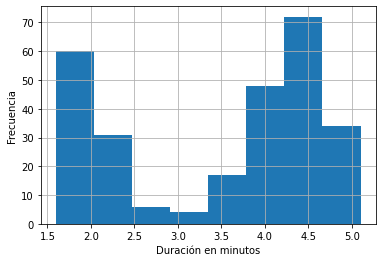

In [18]:
# histograma duración de erupciones con 8 barras
faithful['eruptions'].hist(bins=8) 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

---

Como podemos ver con este gráfico, la duración más frecuente de las erupciones del géiser ronda en alrededor de cuatro minutos y medio. Una cosa que debemos hacer notar es que en los histogramas, los contenedores dividen a todos los valores de la variable cuantitativa, por lo que no deberíamos encontrar espacios entre las barras (a diferencia de lo que pasaba con los gráficos de barras que vimos en el artículo anterior). 


Cualquier espacio entre las barras es una brecha en los datos, que nos indica un región para la que no existen valores.

---

### 2.1.8. Distribución de frecuencia
---

Un tema íntimamente relacionado con los histogramas son las tablas de distribución de frecuencia, en definitiva los histogramas no son más que gráficos de tablas de distribución de frecuencia. La distribución de frecuencia de una variable cuantitativa consiste en un resumen de la ocurrencia de un dato dentro de una colección de categorías que no se superponen.

Estas categorías las vamos a poder armar según nuestra conveniencia y lo que queramos analizar. Por ejemplo si quisiéramos armar la distribución de frecuencia de la variable eruptions podríamos realizar las siguiente manipulaciones con Pandas:

In [19]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(1.5, 6., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(faithful['eruptions'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

(4.0, 4.5]    75
(1.5, 2.0]    55
(4.5, 5.0]    54
(2.0, 2.5]    37
(3.5, 4.0]    34
(3.0, 3.5]     9
(2.5, 3.0]     5
(5.0, 5.5]     3
Name: eruptions, dtype: int64

Como nos nuestra esta tabla de distribución de frecuencia, la duración que más veces ocurre para las erupciones, se encuentran en el rango de 4 a 4.5 minutos.

---

### 2.1.9. Diagrama de dispersión
---

Hasta aquí venimos graficando únicamente una sola variable cuantitativa pero **¿qué pasa si queremos trabajar con dos variables?** Para estos casos existe el diagrama de dispersión. 

El *diagrama de dispersión* es una de las formas más comunes que existen para visualizar datos y constituye una de las mejores forma de observar relaciones entre dos variables cuantitativas. 

Veremos que se puede observar un montón de cosas por el solo hecho de mirar. 

---
Este diagrama es una de las mejores formas de visualizar las asociaciones que pueden existir entre nuestros datos.

El diagrama de dispersión empareja los valores de dos variables cuantitativas y luego los representa como puntos geométricos dentro de un diagrama cartesiano. 

Por ejemplo, volviendo a nuestro dataset faithful, podríamos emparejar a las variables eruptions y waiting en la misma observación como coordenadas (x, y) y luego graficarlas en el eje cartesiano. 

Con la ayuda de Python podríamos generar el diagrama de dispersión del siguiente modo:

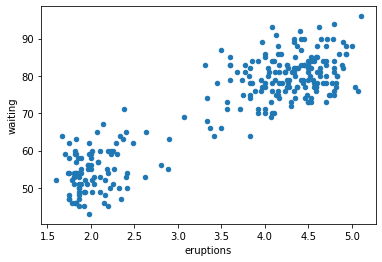

In [20]:
# diagrama de dispersión
disp= faithful.plot(kind='scatter', x='eruptions', y='waiting')

Como podemos ver con solo observar la dispersión de los datos parece existir una relación lineal entre los datos de este dataset....

---
---
---
<a id="b"></a>
<h1><center>2.2. Medidas Principales</center></h1>

[Regreso a contenido](#contenido)


## [Tendencia Central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central)  y [Dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n) 

---
Una vez que ya nos dimos una buena idea visual de como se distribuyen los datos y de las relaciones que pueden existir entre los mismos, podemos pasar a calcular medidas numéricas propias de la estadística descriptiva. 

En general, suele ser interesante conocer cual puede ser el promedio o valor central al que tiende la distribución de nuestros datos, para esto se utilizan las medidas de tendencia central, entre las que podemos encontrar a:
   * La media aritmética
   * La media geométrica
   * La media armónica
   * La mediana
   * La media truncada (o trimedia)
   * La moda

---------

Por un lado, la Media corresponde al punto de equilibrio que toma en cuenta la ubicación y el peso de cada dato. Mientras que la Mediana solo toma en cuenta la ubicación, correspondiendo al percentil 50, es decir, divide la muestra en dos grupos con igual cantidad de datos. Por otro lado, la Moda representa el punto de mayor concentración de datos en una muestra, pudiéndose incluso obtener varias modas.

--------


Veamos como podemos calcularlas con Python:

### 2.2.1. Media aritmética
---
La media aritmética es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos. La calculamos con el método mean.

In [21]:
# media de variable eruptions
faithful['eruptions'].mean()

## para el cálculo de la mediana se deben ordenar los datos de forma ascendente o descendente
# np.sort(faithful['eruptions'])

3.4877830882352936

### 2.2.2. Media geométrica
---
La media geométrica es útil cuando queremos comparar cosas con propiedades muy diferentes; también es recomendada para datos de progresión geométrica, para promediar razones, interés compuesto. Se calcula tomando la raíz n-ésima del producto de todos los datos. La calculamos con la función gmean de SciPy.

In [22]:
from scipy.stats import gmean 
# media geométrica
gmean(faithful['eruptions'])

3.2713131325361786

### 2.2.3. Media armónica
---
La media armónica promedia el número de elementos y los divide por la suma de sus inversos. La media armónica es siempre la media más baja y es recomendada para promediar velocidades. La calculamos con la función hmean de SciPy.

In [23]:
from scipy.stats import hmean 
# media armónica
hmean(faithful['eruptions'])

3.038933049947261

### 2.2.4. Mediana
---
La mediana representa el valor de posición central en un conjunto de datos ordenados. La podemos calcular utilizando el método median de Pandas:

In [24]:
# mediana
faithful['eruptions'].median()

4.0

### 2.2.5. Media truncada (Trimedia)
---
La media truncada es una *mezcla* entre la media aritmética y la mediana. Para calcular el promedio previamente se descartan porciones en el extremo inferior y superior de la distribución de los datos. En Python podemos utilizar la función trim_mean de SciPy.

In [25]:
from scipy.stats import trim_mean 
# media truncada, recortando el 10 superior e inferior
trim_mean(faithful['eruptions'], .10)

3.5298073394495413

### 2.2.6. Moda
---
Por último, la moda es el valor que tiene mayor frecuencia absoluta. Son los picos que vemos en el histograma. Dependiendo de la la distribución de los datos puede existir más de una, como en el caso de la variable eruptions. La calculamos con el método mode.

In [26]:
# moda
faithful['eruptions'].mode()

#from scipy.stats import mode
#mode(faithful['eruptions'])

0    1.867
1    4.500
dtype: float64

---
---
---
<a id="c"></a>
<h1><center>2.3. Medidas de dispersión</center></h1>

[Regreso a contenido](#contenido)

---
Las medidas de tendencia central no son las únicas medidas de resumen estadístico que podemos calcular; otras medidas también de gran importancia son las **medidas de dispersión**. 

Las medidas de dispersión, también llamadas medidas de variabilidad, muestran la variabilidad de una distribución, indicando por medio de un número si las diferentes puntuaciones de una variable están muy alejadas de la media. Cuanto mayor sea ese valor, mayor será la variabilidad, y cuanto menor sea, más homogénea será a la media.

---
Así se sabe si todos los casos son parecidos o varían mucho entre ellos. Las principales medidas de dispersión son:
   * Varianza
   * Desviación estándar
   * Cuartiles
   * Covarianza
   * Coeficiente de correlación


Analicemos cada uno de ellos:

### 2.3.1. Varianza
---
La varianza intenta describir la dispersión de los datos. Se define como la esperanza del cuadrado de la desviación de dicha variable respecto a su media. 

Una varianza pequeña indica que los puntos de datos tienden a estar muy cerca de la media y por lo tanto el uno al otro, mientras que una varianza alta indica que los puntos de datos están muy distribuidos alrededor de la media y la una de la otra. 

La podemos calcular con el método var.

In [27]:
# varianza
faithful['eruptions'].var()

1.3027283328494672

### 2.3.2. Desviación estándar
---
La desviación estandar o desviación típica es una medida que se utiliza para cuantificar la cantidad de variación o dispersión de un conjunto de valores de datos. 

Un desvío estándar cerca de 0 indica que los puntos de datos tienden a estar muy cerca de la media del conjunto, mientras que un alto desvío estándar indica que los puntos de datos se extienden a lo largo de un rango amplio de valores. 

Se calcula como la raíz cuadrada de la varianza y con Pandas lo podemos obtener con el método std.

In [28]:
# desvio estándar
faithful['eruptions'].std()

1.1413712511052077

### 2.3.3. Cuartiles
---
Los cuartiles son los tres puntos que dividen el conjunto de datos en cuatro grupos iguales, cada grupo comprende un cuarto de los datos.El (Q1) se define como el número medio entre el número más pequeño y la mediana del conjunto de datos. El segundo cuartil (Q2) es la mediana de los datos. El tercer cuartil (Q3) es el valor medio entre la mediana y el valor más alto del conjunto de datos. Para dividir nuestro dataset en sus cuartiles utilizamos el método quantile.

In [29]:
# cuartiles
faithful['eruptions'].quantile([.25, .5, .75])

0.25    2.16275
0.50    4.00000
0.75    4.45425
Name: eruptions, dtype: float64

Un gráfico relacionado a los cuartiles y describe varias características importantes al mismo tiempo, tales como la dispersión y simetría es el **diagrama de caja**. 

Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Podemos utilizar la función boxplot de Seaborn para generarlo.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


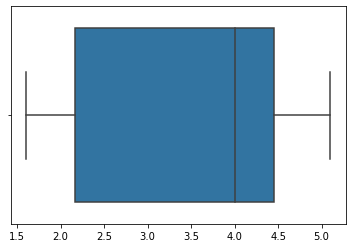

In [30]:
# diagrama de cajas
cajas=sns.boxplot(list(faithful['eruptions']))

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


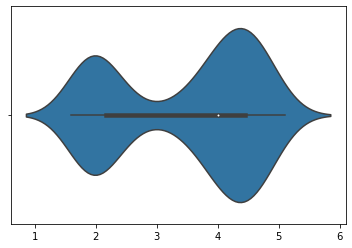

In [31]:
# diagrama de cajas
cajas=sns.violinplot(list(faithful['eruptions']))

Hasta aquí hemos calculado medidas de dispersión para una sola variable, pero nuestro dataset tiene dos variables cuantitativas; veamos como podemos calcular medidas combinadas para la dos variables.

#### Cuartiles y diagramas de cajas
---
Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.

![alt text](https://es.justexw.com/wp-content/uploads/sites/2/diagrama-de-caja-ejemplo.jpg)

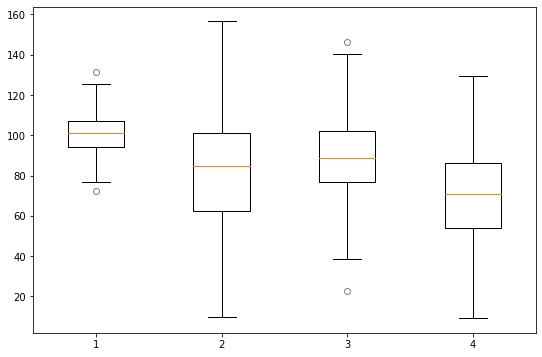

In [32]:
# Ejemplo de grafico de cajas en python

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

#### Regresiones
---
Las regresiones es una de las herramientas principales de la estadistica inferencial. El objetivo del análisis de regresión es describir la relación entre un conjunto de variables, llamadas variables dependientes, y otro conjunto de variables, llamadas variables independientes o explicativas. 

Más específicamente, el análisis de regresión ayuda a entender cómo el valor típico de la variable dependiente cambia cuando cualquiera de las variables independientes es cambiada, mientras que se mantienen las otras variables independientes fijas.

El producto final del análisis de regresión es la estimación de una función de las variables independientes llamada la función de regresión. 

**La idea es que en base a esta función de regresión podamos hacer estimaciones sobre eventos futuros**.

---
La regresión lineal es una de las técnicas más simples y mayormente utilizadas en los análisis de regresiones. Hace suposiciones muy rígidas sobre la relación entre la variable dependiente y y variable independiente x. Asume que la relación va a tomar la forma: $y=β0+β1∗x$

---
Uno de los métodos más populares para realizar regresiones lineales es el de mínimos cuadrados ordinarios (OLS, por sus siglas en inglés), este método es el estimador más simple y común en la que los dos βs se eligen para minimizar el cuadrado de la distancia entre los valores estimados y los valores reales.

Veamos un pequeño ejemplo utilizando el dataset longley, el cual es ideal para realizar regresiones:

In [33]:
# importando la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Creando un DataFrame de pandas.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head() # longley dataset

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [34]:
# utilizando la api de formula de statsmodels
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary() # Employed se estima en base a GNP.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           8.36e-12
Time:                        10:58:29   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos ver, el resumen que nos brinda statsmodels sobre nuestro modelo de regresión contiene bastante información sobre como se ajuste el modelo a los datos. Pasemos a explicar algunos de estos valores:


   * Dep. Variable: es la variable que estamos estimasdo.
   * Model: es el modelo que estamos utilizando.
   * R-squared: es el coeficiente de determinación, el cual mide cuan bien nuestra recta de regresion se aproxima a los datos reales.
   * Adj. R-squared: es el coeficiente anterior ajustado según el número de observaciones.
   * [95.0% Conf. Int.]: Los valores inferior y superior del intervalo de confianza del 95%.
   * coef: el valor estimado del coeficiente.
   * std err: el error estándar de la estimación del coeficiente.
   * Skew: una medida de la asimetria de los datos sobre la media.
   * Kurtosis: Una medida de la forma de la distribución. La curtosis compara la cantidad de datos cerca de la media con los que están más lejos de la media(en las colas).


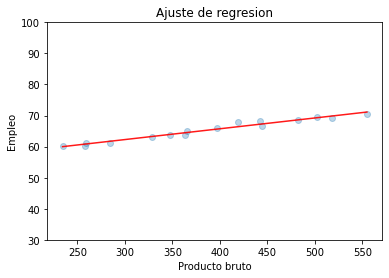

In [35]:
# grafico de regresion. que tanto se ajusta el modelo a los datos.
y = df.Employed  # Respuesta
X = df.GNP  # Predictor
X = sm.add_constant(X) # agrega constante

X_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_1 = sm.add_constant(X_1) 

y_reg = est.predict(X_1) # estimacion

plt.scatter(X.GNP, y, alpha=0.3)  # grafica los puntos de datos
plt.ylim(30, 100)  # limite de eje y
plt.xlabel("Producto bruto") # leyenda eje x
plt.ylabel("Empleo") # leyenda eje y
plt.title("Ajuste de regresion") # titulo del grafico
reg = plt.plot(X_1.GNP, y_reg, 'r', alpha=0.9)  # linea de regresion

---
### 2.3.4. [Covarianza](https://es.wikipedia.org/wiki/Covarianza)  
---
La covarianza es el equivalente de la varianza aplicado a una variable bidimensional. 

Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias.La covarianza indica el sentido de la correlación entre las variables; Si es mayor que cero la correlación es directa, en caso de ser menor, la correlación es inversa. La podemos calcular utilizando el método cov.

In [36]:
# covarianza
faithful.cov()

,eruptions,waiting
eruptions,1.302728,13.977808
waiting,13.977808,184.823312


### ¿Diferencia entre covarianza y correlación?

La covarianza y la correlación son muy útiles para comprender la relación entre dos variables continuas. La covarianza indica si ambas variables varían en la misma dirección (covarianza positiva) o en dirección opuesta (covarianza negativa).

No hay importancia en el valor numérico de covarianza, solo el signo es útil. Mientras que la correlación explica sobre el cambio en una variable, indicando cuánto cambio de proporción hay con respecto a la segunda variable.

La correlación varía entre -1 a +1. Si el valor de correlación es 0, significa que no existe una relación lineal entre las variables, sin embargo, puede existir otra relación funcional.

--------

En el estudio de la covarianza sólo el signo importa. El valor positivo muestra que ambas variables varían en la misma dirección y el valor negativo muestra que varían en la dirección opuesta.

La covarianza entre dos variables x e y se puede calcular de la siguiente manera:

![img](https://sitiobigdata.com/wp-content/uploads/2019/10/Qu%C3%A9-es-Covarianza-y-correlaci%C3%B3n1.png)

Dónde:

    x̄ es la media muestral de x
    ȳ es la media muestral de y
    x_i e y_i son los valores de x e y para el i-ésimo dato en la muestra.
    n es el no. de datos en la muestra


### 2.3.5. [Correlación](https://www.incibe-cert.es/blog/correlacion-herramientas-analisis-datos)  
---
El coeficiente de correlación es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación. En los informes de correlación, este coeficiente se simboliza con la r.

El coeficiente de correlación oscila entre -1 y 1. 

**Los valores de r positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos**.

**Los valores de r negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden**.

Un valor de 0 implica que no existe una correlación lineal entre las variables.

----------

**¿Cómo se utiliza el coeficiente de correlación?**

Para dos variables, la fórmula compara la distancia de cada dato puntual respecto a la media de la variable y utiliza esta comparación para decirnos hasta qué punto la relación entre las variables se ajusta a una línea imaginaria trazada entre los datos. A esto nos referimos cuando decimos que la correlación examina las relaciones lineales.

------------

**¿Qué limitaciones hay que tener en cuenta?**

La correlación sólo se refiere a las dos variables dadas y no aporta información sobre las relaciones más allá de los datos bivariados. Esta prueba no puede detectar valores atípicos en los datos (y por tanto <font color=red>estos sesgan los resultados</font>) y tampoco puede detectar correctamente las relaciones curvilíneas.


In [37]:
# coeficiente de correlación
faithful.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


![img](https://www.jmp.com/es_co/statistics-knowledge-portal/what-is-correlation/correlation-coefficient/_jcr_content/par/styledcontainer_2069/par/image_9254.img.gif/1596641539725.gif)

---
---
---
<a id="d"></a>
<h1><center>2.4. Distribuciones de probabilidad</center></h1>

[Regreso a contenido](#contenido)

---

---
Las variables aleatorias han llegado a desempeñar un papel importante en casi todos los campos de estudio....

Estas variables aleatorias son medidas y analizadas en términos de sus propiedades estadísticas y probabilístas, de las cuales una característica subyacente es su función de distribución. 

* A pesar de que el número potencial de distribuciones puede ser muy grande, en la práctica, un número relativamente pequeño se utilizan; ya sea porque tienen características matemáticas que las hace fáciles de usar o porque se asemejan bastante bien a una porción de la realidad, o por ambas razones combinadas.

---
### 2.4.1. ¿Por qué es importante conocer las distribuciones?
---
Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general **a partir del estudio de una muestra de esta población**. Este proceso se conoce como <font color=red>**inferencia estadística**</font>; y este tipo de inferencia con frecuencia se basa en hacer <font color=blue>suposiciones</font> acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las distribuciones conocidas y estudiadas en profundidad.

Las distribuciones de probabilidad teóricas son útiles en la inferencia estadística porque sus propiedades y características son conocidas. Si la distribución real de un conjunto de datos dado es razonablemente cercana a la de una distribución de probabilidad teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la distribución teórica.

---

Hay muchas distribuciones de probabilidad, pero aquí hablaremos de las más comunes y usadas. Pero primero, necesitamos comprender las funciones de probabilidad para variables aleatorias continuas.

---
Las distribuciones se pueden clasificar en dos grandes grupos:

* Distribuciones Continuas: son aquellas que presentan un número infinito de posibles soluciones. Dentro de este grupo vamos a encontrar a las distribuciones:
    1. Normal (o Gaussiana)
    2. Log-Normal
    3. Exponencial
    4. Chi Cuadrada
    5. t - Student
    6. etc...
* Distribuciones Discretas: son aquellas en las que la variable puede tomar un número determinado de valores. Los principales exponentes de este grupo son las distribuciones:
    1. Poisson
    2. Binomial
    3. Geométrica
    4. Bernoulli
    5. etc...


---
### 2.4.2. Graficando distribuciones
---
Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un histograma, que es un gráfico que muestra la frecuencia de cada valor.

In [38]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

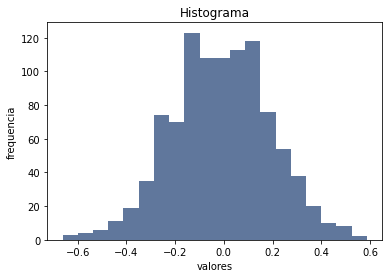

In [39]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

**Función de densidad de probabilidad (pdf)**

Consideremos un experimento en el que la probabilidad de eventos es la siguiente. La probabilidad de obtener los números 1, 2, 3, 4 es 1/10, 2/10, 3/10, 4/10 respectivamente. 

Sería más conveniente para nosotros si tuviéramos una ecuación para ese experimento que nos diera esos valores basados en la probabilidad de eventos. 

Por ejemplo, la ecuación de este experimento se puede establecer en f (x) = x / 10, donde x = 1,2,3,4. Esta ecuación (o función) se llama función de distribución de probabilidad. Aunque algunos autores también la llaman función de probabilidad, función de frecuencia o función de masa de probabilidad. Nos dice que tan probable es que *aparezca* una variable aleatoria x.


**Función de distribución acumulativa (cdf)**

La función de distribución acumulativa proporciona una imagen integral de la distribución de probabilidad. Como sugiere el nombre acumulativo, es simplemente la probabilidad de que una variable tome un valor menor o igual a un valor particular. En el ejemplo anterior dado x = 3, la CDF nos dice la probabilidad de la suma de todas las variables aleatorias de 1 a 3.



---
### 2.4.3. Distribuciones continuas
---

En esta sección, como sugiere el título, investigamos distribuciones probabilísticas de variables aleatorias continuas, es decir, variables aleatorias cuyo soporte contiene un rango infinito de posibles resultados.


#### 2.4.3.1 Distribución uniforme

Es un tipo de distribución de probabilidades donde todos los resultados son igualmente probables; cada variable tiene la misma probabilidad de que sea el resultado. 

Una baraja de cartas tiene distribuciones uniformes porque la probabilidad de que se saque un corazón, un trébol, un diamante o una espada es la misma. La moneda también tiene una distribución uniforme porque la probabilidad de que salga cara o cruz en el lanzamiento de la moneda es la misma.

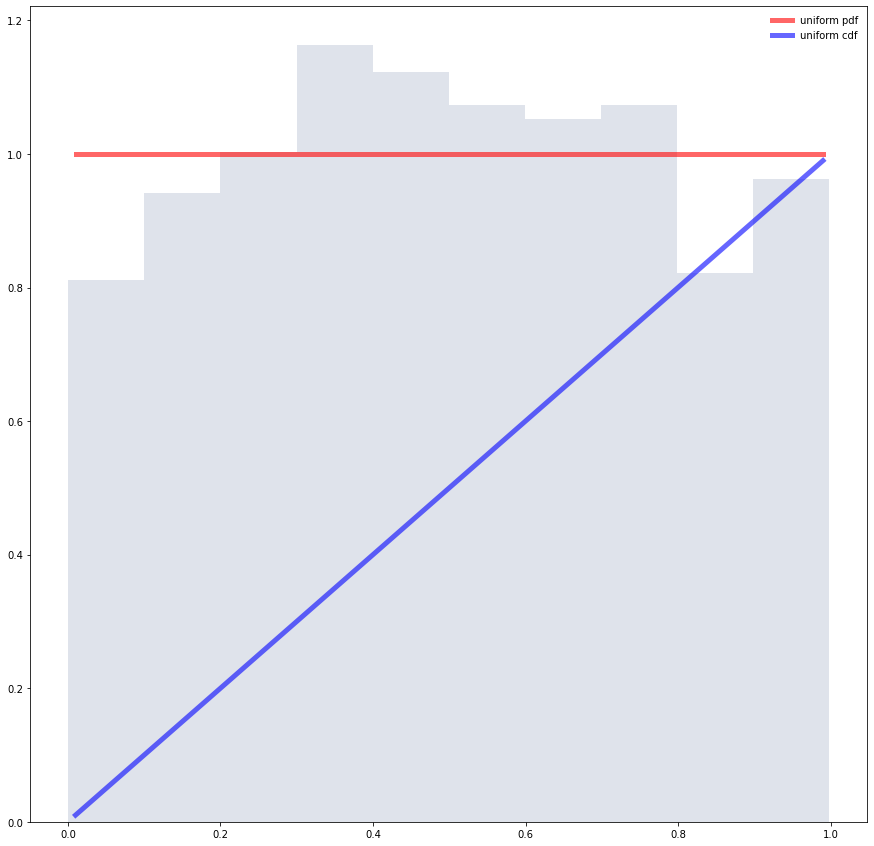

In [40]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np


def uniform2():
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    mean, var, skew, kurt = uniform.stats(moments='mvsk')
    
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.pdf(x),
        'r-', lw=5, alpha=0.6, label='uniform pdf')
    ax.plot(x, uniform.cdf(x),
        'b-', lw=5, alpha=0.6, label='uniform cdf')
    vals = uniform.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

    r = uniform.rvs(size=1000)
    ax.hist(r, density =True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

uniform2()


Más formalmente, esta es la distribución de una variable aleatoria que puede tomar cualquier valor en el intervalo (a, b), y la probabilidad de estar en cualquier segmento dentro (a, b) es proporcional a la longitud del segmento y no depende en su posición, y la probabilidad de valores fuera del intervalo (a, b) es igual a 0.

Entonces, una variable aleatoria continua x tiene una distribución uniforme, denominada U (a, b), si su función de densidad de probabilidad es:

$$ f(x) = 1 / (b - a) $$

#### 2.4.3.2 Distribución Normal (Gaussiana)

---
La distribución normal es una de las principales distribuciones, ya que es la que con más frecuencia aparece aproximada en los fenómenos reales. 

Tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Con la ayuda de Python y haciendo uso de matplot (ver la siguiente [liga](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) para mayor información de la paquetería de matplotlib) la podemos graficar de la siguiente manera:

In [41]:
# Graficos embebidos.
%matplotlib inline 
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn
import numpy as np    #importando numpy
# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [42]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

#Recuerden poner diversos parametros para visualizar distintas gausianas
#mu, sigma = 0, 1 # media y desvio estandar
#s = np.random.normal(mu, sigma, 100) #creando muestra de datos

#mu, sigma = 2, 0.5 # media y desvio estandar
#s = np.random.normal(mu, sigma, 10000) #creando muestra de datos

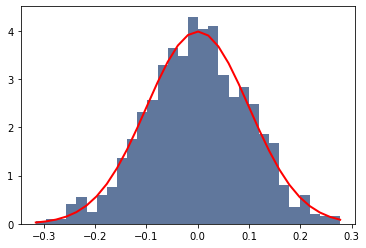

In [43]:
# histograma de distribución normal.
#Recordemos que la función plt.hist tiene la posibilidad de recibir diversos parámetros,
#en este ejemplo, estamos usando los el conjunto de datos 's', los bins = '30' para definir 
#el rango de las barras graficadas y density = 'true' hace referencia para formar el area bajo la curva gaussiana.
cuenta, cajas, ignorar = plt.hist(s, 30, density=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

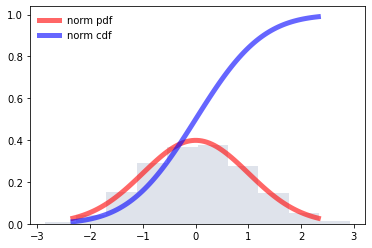

In [44]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


def normal() -> None:
    fig, ax = plt.subplots(1, 1)
    mean, var, skew, kurt = norm.stats(moments='mvsk')
    x = np.linspace(norm.ppf(0.01),  norm.ppf(0.99), 100)
    ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
    ax.plot(x, norm.cdf(x),
        'b-', lw=5, alpha=0.6, label='norm cdf')
    vals = norm.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

    r = norm.rvs(size=1000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

normal()


La importancia de las distribuciones normales se debe principalmente al hecho de que las distribuciones de muchos fenómenos naturales se distribuyen al menos aproximadamente de manera normal. 

Una de las primeras aplicaciones de las distribuciones normales fue el análisis de errores de medidas realizadas en observaciones astronómicas, errores provocados por instrumentos imperfectos y observadores imperfectos.... 

$$p(x;μ,σ^{2})=(1/{σ√2π})e^{−1/2} (\displaystyle\frac{x−μ}{σ})^2$$


En dónde $μ$ es el parámetro de ubicación, y va a ser igual a la media aritmética y $σ^{2}$ es la desviación estándar. Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:

   * características morfológicas de individuos, como la estatura;
   * características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos;
   * características psicológicas, como el cociente intelectual;
   * nivel de ruido en telecomunicaciones;
   * errores cometidos al medir ciertas magnitudes;
   * etc.

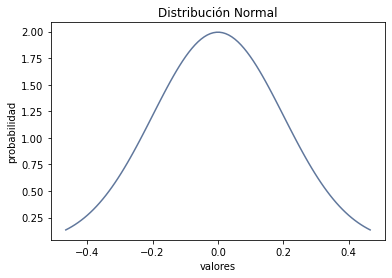

In [45]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

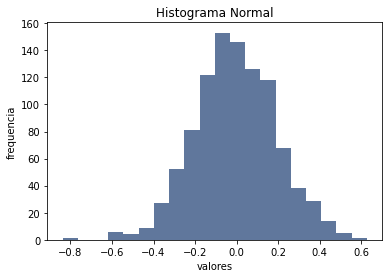

In [46]:
# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

#### 2.4.3.3 Distribución Log-Normal
---
La Distribución Log-normal esta dada por la formula:  

$$p(x;μ,σ)=(1/{xσ√2π})e^{−1/2} (\displaystyle\frac{ln(x−μ)}{σ})^2$$


En dónde la variable $x>0$ y los parámetros $μ$ y $σ>0$ son todos números reales. La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribución con asimetría positiva. Algunos de los ejemplos en que la solemos encontrar son:

   * El peso de los adultos.
   * La concentración de los minerales en depósitos.
   * Duración de licencia por enfermedad.
   * Distribución de riqueza
   * Tiempos muertos de maquinarias.

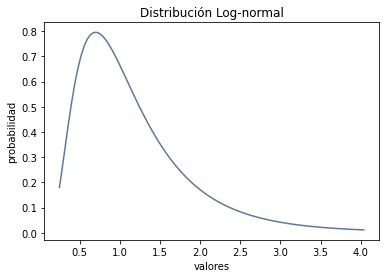

In [47]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

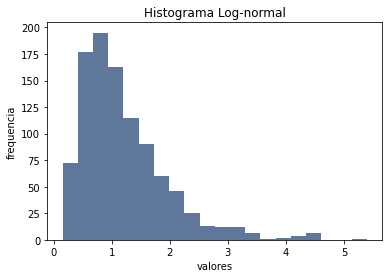

In [48]:
# histograma
aleatorios = lognormal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.show()

#### 2.4.3.4 Distribución Exponencial
---
La Distribución Exponencial esta dada por la formula:
$$p(x;α)= \displaystyle\frac{1}{α}e^{\displaystyle\frac{-x}{α}}$$

En dónde tanto la variable $x$ como el parámetro $α$ son números reales positivos. La Distribución Exponencial tiene bastantes aplicaciones, tales como la desintegración de un átomo radioactivo o el tiempo entre eventos en un proceso de Poisson donde los acontecimientos suceden a una velocidad constante.

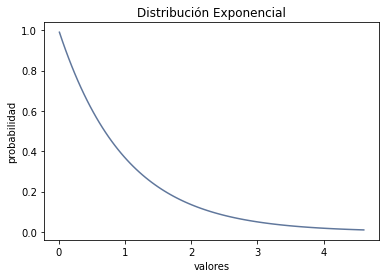

In [49]:
# Graficando Exponencial
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

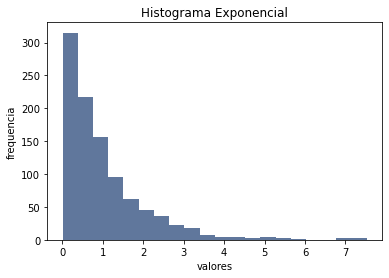

In [50]:
# histograma
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

#### 2.4.3.5 Distribución Chi Cuadrada
---
La Distribución Chi cuadrado esta dada por la función:
$p(x;n)= \displaystyle\frac{(\displaystyle\frac{x}{n})^{{\displaystyle\frac{n}{2}}-1}\epsilon^(\displaystyle\frac{-x}{2})}
{2\Gamma(\displaystyle\frac{n}{2})}$

En dónde la variable $x≥0$ y el parámetro $n$, el número de grados de libertad, es un número entero positivo. Una importante aplicación de la Distribución Chi cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

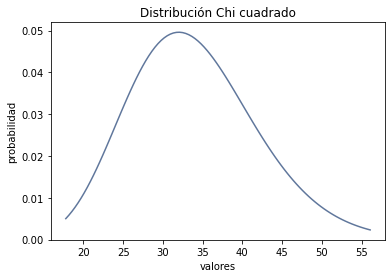

In [51]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

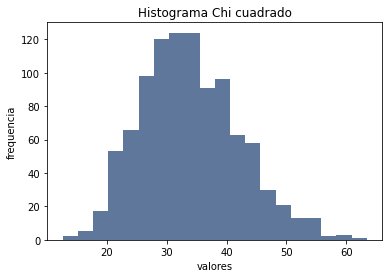

In [52]:
# histograma
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

#### 2.4.3.6 Distribución T de Student
---
La Distribución t de Student es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa. 

Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

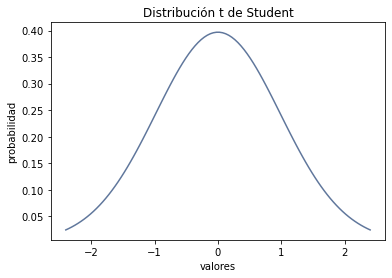

In [53]:
# Graficando t de Student
df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

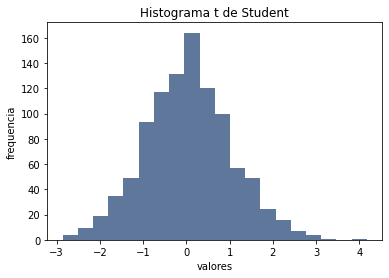

In [54]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

---
### 2.4.4 Distribuciones Discretas

#### 2.4.4.1 Distribución Poisson
---
La Distribución Poisson esta dada por la formula:  $$p(r;μ)=μ^{r}e^{−μ}/r!$$


En dónde $r$ es un entero $(r≥0)$ y $μ$ es un número real positivo. La Distribución Poisson describe la probabilidad de encontrar exactamente $r$ eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante $μ$. 

* Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios.
---
En Python la podemos generar fácilmente con la ayuda de scipy.stats, paquete que utilizaremos para representar a todas las restantes distribuciones a lo largo de todo el bloque.

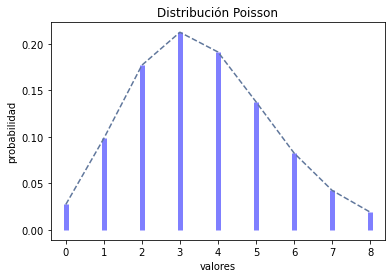

In [55]:
# Graficando Poisson
mu =  3.6 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

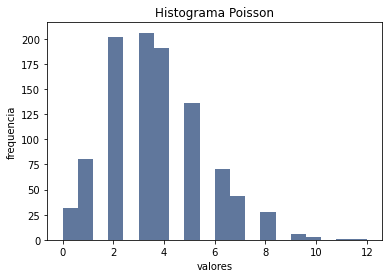

In [56]:
# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

#### 2.4.4.2 Distribución Binomial
---
La Distribución Binomial esta dada por la formula:
$$p(r;N,p)=\binom{N}{r}p^r(1−p)N−r$$

En dónde $r$ con la condición $0≤r≤N$ y el parámetro $N$ $(N>0)$ son enteros; y el parámetro $p$ $(0≤p≤1)$ es un número real. La Distribución Binomial describe la probabilidad de exactamente $r$ éxitos en $N$ pruebas si la probabilidad de éxito en una sola prueba es $p$.

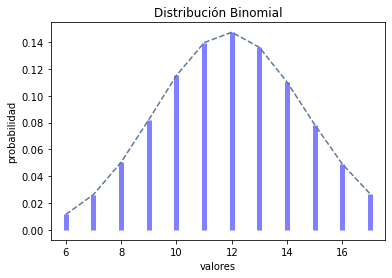

In [57]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

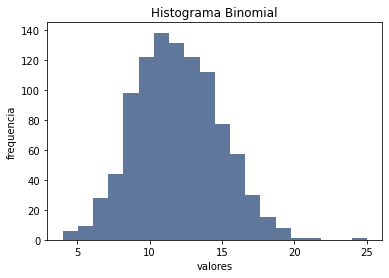

In [58]:
# histograma
aleatorios = binomial.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

#### 2.4.4.3. Distribución Geométrica
---
La Distribución Geométrica esta dada por la formula:
$$p(r;p)=p(1−p)^{r−1}$$

En dónde $r≥1$ y el parámetro $p$ $(0≤p≤1)$ es un número real. La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente $r$ pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es $p$. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

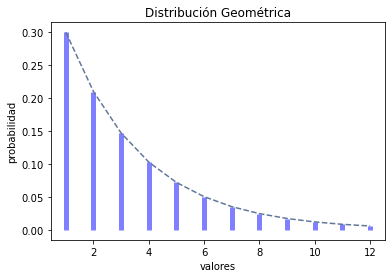

In [59]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

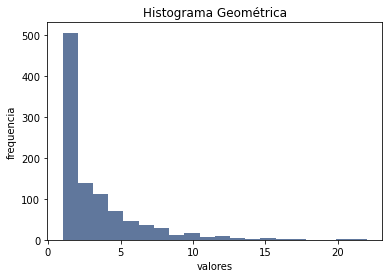

In [60]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

#### 2.4.4.4 Distribución Bernoulli
---
La Distribución de Bernoulli esta dada por la formula:
$p(r;p)$=$\left \{ \begin{matrix} 1−p = q & \mbox{si }r\mbox{ = 0 ( fracaso )}
\\ p & \mbox{si }r\mbox{ = 1 (éxito)}\end{matrix}\right. $

En dónde el parámetro $p$ es la probabilidad de éxito en un solo ensayo, la probabilidad de fracaso por lo tanto va a ser $1−p$ (muchas veces expresada como $q$). Tanto $p$ como $q$ van a estar limitados al intervalo de cero a uno. La Distribución de Bernoulli describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta distribución se pueden deducir varias Funciones de Densidad de Probabilidad de otras distribuciones que se basen en una serie de ensayos independientes.

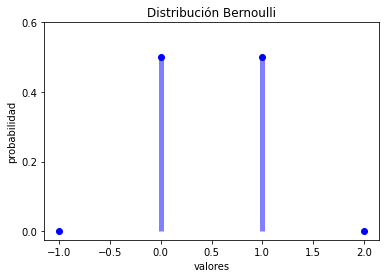

In [61]:
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

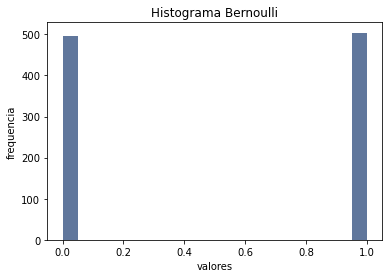

In [62]:
# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

# ¿Cómo elegir la distribución que mejor se ajusta a mis datos?
---
Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero **¿cómo determinamos que distribución debemos utilizar?**

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos **sin procesar** y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos. 

   * La primer pregunta se refiere a si los datos pueden tomar valores discretos o continuos. 
   * La segunda pregunta que nos debemos hacer, hace referencia a la simetría de los datos y si hay asimetría, en qué dirección se encuentra; en otras palabras, son los valores atípicos positivos y negativos igualmente probables o es uno más probable que el otro. 
   * La tercer pregunta abarca los límites superiores e inferiores en los datos; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%). 
   * La última pregunta se refiere a la posibilidad de observar valores extremos en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia. Este proceso, lo podemos resumir en el siguiente gráfico:

![alt text](https://2.bp.blogspot.com/-SpjgitfNMb0/TteevRR_Y2I/AAAAAAAAAFQ/IZgd32z2AI8/s1600/distributions.png)

### Distribuciones simetricas y asimetricas
---
Una distribución es simétrica cuando moda, mediana y media coinciden aproximadamente en sus valores. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

Una distribución tiene asimetria positiva (o a la derecha) si la "cola" a la derecha de la media es más larga que la de la izquierda, es decir, si hay valores más separados de la media a la derecha. De la misma forma una distribución tiene asimetria negativa (o a la izquierda) si la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda.

Las distribuciones asimétricas suelen ser problemáticas, ya que la mayoría de los métodos estadísticos suelen estar desarrollados para distribuciones del tipo normal. Para salvar estos problemas se suelen realizar transformaciones a los datos para hacer a estas distribuciones más simétricas y acercarse a la distribución normal.

Entrar a la siguiente liga para más información de la función [gama](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).


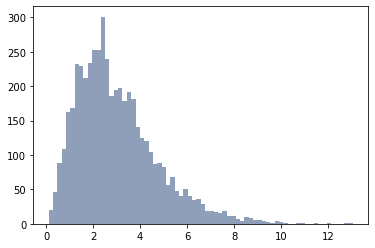

In [63]:
# Dibujando la distribucion Gamma
#import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
#import pandas as pd # importando pandas

#np.random.seed(2131982) # para poder replicar el random

x = stats.gamma(3).rvs(5000)
gamma = plt.hist(x, 70, histtype="stepfilled", alpha=.7)

En este ejemplo podemos ver que la distribución gamma que dibujamos tiene una asimetria positiva. Les recomiendo echarle un vistazo al siguiente [link](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/). para entender un poco mejor la cuestión de la asimetría en los datos.



In [64]:
# Calculando la simetria con scipy
stats.skew(x)

1.0990196123353102

---
---
---
<a id="e"></a>
<h1><center>2.5. Ejercicio: Analizando las estadísticas del desempleo a nivel mundial</center></h1>

[Regreso a contenido](#contenido)

---


Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [65]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/data/desempleo_mundial.csv

Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Aruba,ABW,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AfganistÃ¡n,AFG,2.976000071,3.173000097,3.463000059,3.611999989,3.653000116,3.621000051,3.602999926,3.536000013,3.605999947,3.51699996,3.426000118,3.549999952,3.41899991,3.086999893,2.941999912,2.825000048,2.128000021,2.493999958,2.470000029,2.275000095,1.983999968,1.692000031,1.725000024,1.735000014,1.67900002,1.633999944,1.559000015,1.542000055,1.519000053
Angola,AGO,22.60199928,20.92499924,21.25,21.1590004,21.14800072,20.06599998,21.46500015,20.43799973,20.89699936,22.88500023,23.11499977,23.89599991,23.92499924,23.64299965,20.53199959,17.67399979,14.63300037,12.04399967,10.60900021,9.088999748,7.361999989,7.359000206,7.453999996,7.428999901,7.278999805,7.281000137,7.138999939,7.252999783,7.245999813
Albania,ALB,16.78100014,17.65299988,17.68099976,17.52700043,17.60700035,18.35

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: application
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 83683  100 83683    0     0   332k      0 --:--:-- --:--:-- --:--:--  332k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [66]:
import pandas as pd
!head -n 5 desempleo_mundial.csv

head: cannot open 'desempleo_mundial.csv' for reading: No such file or directory


In [ ]:
import pandas as pd
# leer el dataframe usando read_csv
desempleo_df = pd.read_csv("desempleo_mundial.csv", sep=',', header=0)
# mostrar los primeros elementos con head
desempleo_df.head()

# Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [ ]:
for name, t in zip(desempleo_df.columns, desempleo_df.dtypes):
  print(name, t)

In [ ]:
desempleo_df.info()

#### ¿Qué tamaño tiene nuestro dataset?

Utiliza el método shape para conocer el número de filas y columnas en el dataframe.


In [ ]:
m,n = desempleo_df.shape
print("Filas:", m)
print("Columnas:", n)

### Estadísticas generales del dataset.

Usa describre() para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [ ]:
desempleo_df.describe()


## Tratamiento de datos
### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método isna() de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos isna(), sum(axis=0) y to_frame().T para resumir el resultado de datos faltantes como un conteo por columnas:

In [ ]:
desempleo_df.isna().sum(axis=0).to_frame().T

### Desechar aquellos renglones (o filas) con valores NaN con Pandas


In [ ]:
desempleo_df = desempleo_df.dropna()
desempleo_df


## Graficando el contenido del dataframe

Empecemos en graficar de forma abrupta los datos con el método .plot(). 

In [ ]:
desempleo_df.plot(figsize=(15,4))
desempleo_df.plot(subplots=True, figsize=(15,6))

In [ ]:
test = desempleo_df.melt(id_vars=["Country Name", "Country Code"], var_name="Date", value_name="Value")
test

In [ ]:
test["Date"] = pd.to_numeric(test["Date"])
test.plot.scatter(x="Value", y="Date")
desempleo_df.describe()

In [ ]:
desempleo_df.mean().plot()

In [ ]:
arr = desempleo_df.to_numpy()
arr
arr[:, [2, 3, 4]].mean(axis=0)